In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import random
import math

In [2]:
MRI_Path = './MRNet/MRNet-v1.0/train/axial/{}.npy'

In [3]:
fixedImg = np.load(MRI_Path.format('0701'))

In [4]:
transformedImg = np.zeros(fixedImg.shape)

In [13]:
translation = np.eye(4)
rotX = np.eye(4)
rotY = np.eye(4)
rotZ = np.eye(4)
scaling = np.eye(4)

xTranslationRange = 5
yTranslationRange = 10
zTranslationRange = 10
translation[0, 3] = xTranslationRange * random.random()
translation[1, 3] = yTranslationRange * random.random()
translation[2, 3] = zTranslationRange * random.random()

xRotAngle = math.pi / random.uniform(20, 200)
rotX[1, 1] = math.cos(xRotAngle)
rotX[1, 2] = math.sin(xRotAngle)
rotX[2, 1] = -math.sin(xRotAngle)
rotX[2, 2] = math.cos(xRotAngle)

yRotAngle = math.pi / random.uniform(100, 200)
rotY[0, 0] = math.cos(yRotAngle)
rotY[0, 2] = -math.sin(yRotAngle)
rotY[2, 0] = math.sin(yRotAngle)
rotY[2, 2] = math.cos(yRotAngle)

zRotAngle = math.pi / random.uniform(100, 200)
rotZ[0, 0] = math.cos(zRotAngle)
rotZ[0, 1] = -math.sin(zRotAngle)
rotZ[1, 0] = math.sin(zRotAngle)
rotZ[1, 1] = math.cos(zRotAngle)

scalingX = random.uniform(0.9, 1.1)
scalingY = random.uniform(0.9, 1.1)
scalingZ = random.uniform(0.9, 1.1)
scaling[0, 0] = scalingX
scaling[1, 1] = scalingY
scaling[2, 2] = scalingZ

transMat = translation @ rotZ @ rotY @ rotX @ scaling
print(transMat)

[[ 1.00447101 -0.02113623 -0.02619068  3.76035983]
 [ 0.02360266  0.9240456   0.02730478  6.95573744]
 [ 0.02401005 -0.02412336  1.06885722  0.68024576]
 [ 0.          0.          0.          1.        ]]


In [14]:
scipy.ndimage.affine_transform(input=fixedImg, matrix=np.linalg.inv(transMat), output=transformedImg)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [20]:
path = "./affineTrainingData/{}"
f = open(path.format("test.npz"), "w+")
reshapedLabel = transMat[0:3].flatten()
print(reshapedLabel)
np.savez(f, img = transformedImg, trf = reshapedLabel)
f.close()

[ 1.00447101 -0.02113623 -0.02619068  3.76035983  0.02360266  0.9240456
  0.02730478  6.95573744  0.02401005 -0.02412336  1.06885722  0.68024576]


TypeError: write() argument must be str, not bytes

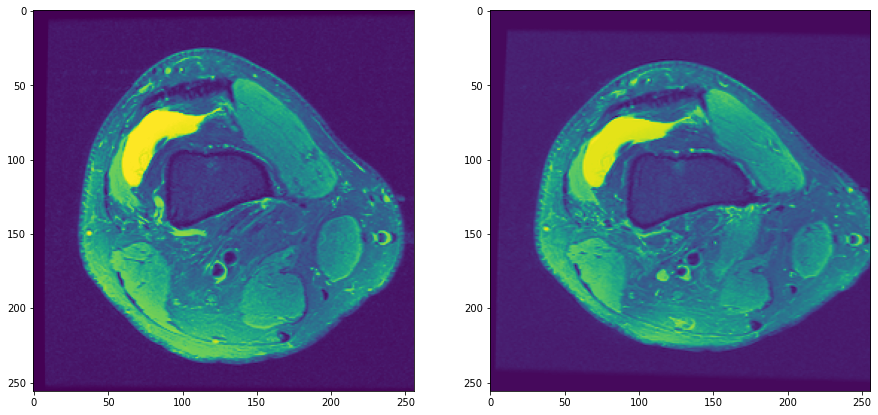

In [16]:
sliceToCheck = 10
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(fixedImg[sliceToCheck, :, :])
axs[1].imshow(transformedImg[sliceToCheck, :, :])